# Parameter Optimisation for Three-Dimensional Printers’ Print Quality

Import the github repo:
`git clone https://github.com/tapashreepradhan/semester-project-H02V8a.git`

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

## 1. Data Loading and Distribution Plots of the Dependent Variables:

Preliminary data visualization of the experimental values via normal distribution curves.

In [3]:
df = pd.read_csv("3d-printer-dataset-two-level.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
 4   roughness                48 non-null     int64  
 5   tension_strength         48 non-null     float64
 6   elongation               48 non-null     float64
dtypes: float64(3), int64(4)
memory usage: 2.8 KB


In [5]:
# independent variables
x_df = df.iloc[:, [0, 1, 2, 3]]
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   layer_height (A)         48 non-null     float64
 1   nozzle temperature (B)   48 non-null     int64  
 2   bed_temperature (C)      48 non-null     int64  
 3   fan_speed (D)            48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [6]:
# dependent variables
y_df = df.iloc[:, [4, 5, 6]]
y_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   roughness         48 non-null     int64  
 1   tension_strength  48 non-null     float64
 2   elongation        48 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.3 KB


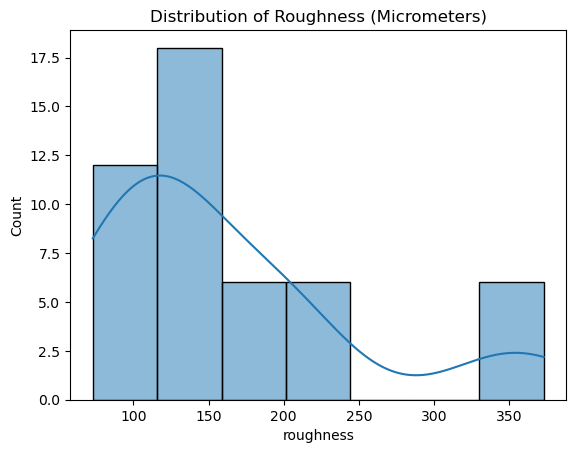

The data for Roughness does not appear to be normally distributed (p-value=0.0000)


In [12]:
# Roughness Distribution

sns.histplot(y_df['roughness'], kde=True)
plt.title(f'Distribution of Roughness (Micrometers)')
plt.savefig('./distribution-plots/roughness-distribution.jpg')
plt.show()
from scipy.stats import shapiro
# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['roughness'])
# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Roughness appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Roughness does not appear to be normally distributed (p-value={p_value:.4f})')

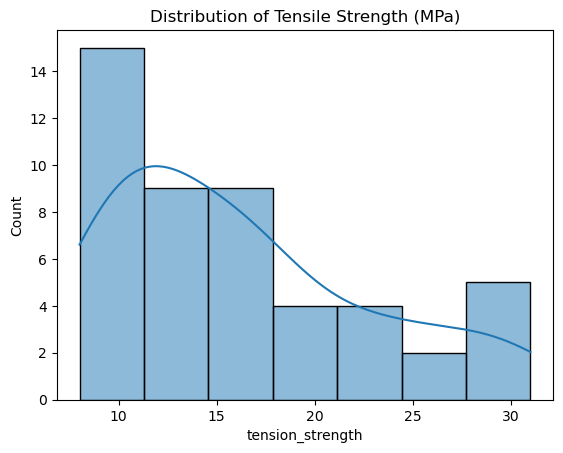

The data for Tensile Strength does not appear to be normally distributed (p-value=0.0007)


In [13]:
# Tensile Strength Distribution

sns.histplot(y_df['tension_strength'], kde=True)
plt.title(f'Distribution of Tensile Strength (MPa)')
plt.savefig('./distribution-plots/tensile-distribution.png')
plt.show()

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['tension_strength'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Tensile Strength appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Tensile Strength does not appear to be normally distributed (p-value={p_value:.4f})')

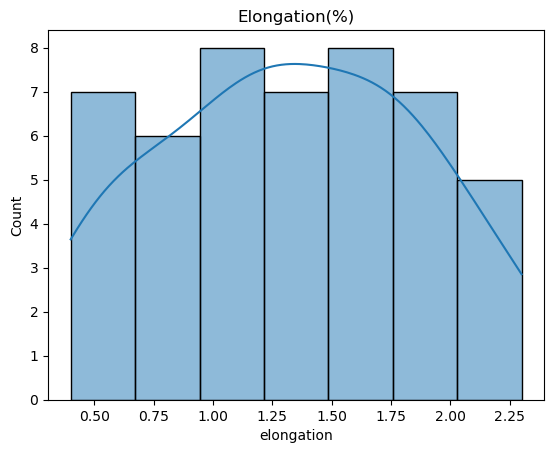

The data for Elongation appears to be normally distributed (p-value=0.1550)


In [14]:
# Elongation Distribution

sns.histplot(y_df['elongation'], kde=True)
plt.title(f'Elongation(%)')
plt.savefig('./distribution-plots/elongation-distribution.png')
plt.show()

from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p_value = shapiro(y_df['elongation'])

# Check the p-value
alpha = 0.05
if p_value > alpha:
    print(f'The data for Elongation appears to be normally distributed (p-value={p_value:.4f})')
else:
    print(f'The data for Elongation does not appear to be normally distributed (p-value={p_value:.4f})')

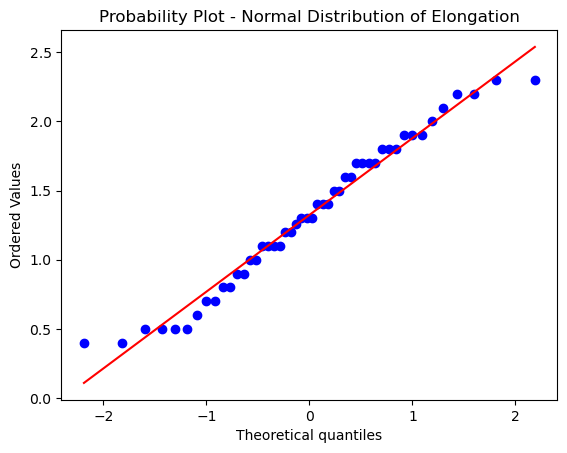

In [20]:
# Create a probability plot for normal distribution
st.probplot(y_df['elongation'], dist="norm", plot=plt)
plt.title("Probability Plot - Normal Distribution of Elongation")
plt.savefig('./distribution-plots/elongation-normal.png')
plt.show()

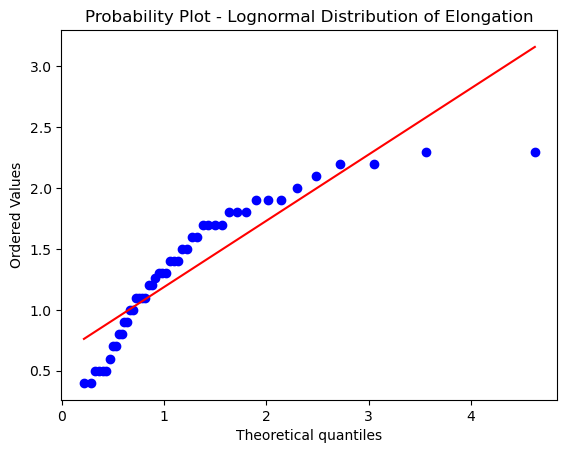

In [22]:
# Create a probability plot for lognormal distribution
st.probplot(y_df['elongation'], dist="lognorm", sparams=(0.7,), plot=plt)
plt.title("Probability Plot - Lognormal Distribution of Elongation")
plt.savefig('./distribution-plots/elongation-lognormal.png')
plt.show()

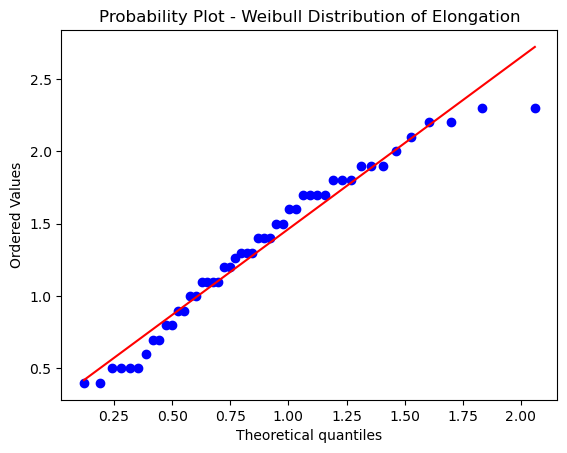

In [25]:
# Create a probability plot for Weibull distribution
st.probplot(y_df['elongation'], dist="weibull_min", sparams=(2,), plot=plt)
plt.title("Probability Plot - Weibull Distribution of Elongation")
plt.savefig('./distribution-plots/elongation-weibull.png')
plt.show()

In [ ]:
!git add -A
!git commit -m "distribution plots"
!git push -f origin

- Note: 
Even though our response variables do not seem to be normally distributed, With a dataset size of 48 runs, the central limit theorem suggests that the distribution of sample means tends to be normal, even if the underlying data is not normally distributed. As a general guideline, t-tests and ANOVA can be reasonably robust to deviations from normality with moderate to large sample sizes. In this case, a sample size of 48 is often considered sufficiently large for these tests.
- t-tests:
With 48 observations, t-tests (both independent samples and paired samples) are generally robust, and the assumption of normality becomes less critical.
Welch's t-test, which is more robust to unequal variances, can be considered if the variances are not assumed to be equal.
- ANOVA:
For one-way ANOVA, a sample size of 48 is generally considered acceptable, and the ANOVA F-test is robust to deviations from normality, especially with relatively equal group sizes.
Two-way ANOVA may be reasonable with a balanced design and 48 observations.

## 2. Hypothesis Formulation:
To determine whether the coefficients and factors are of significance for the model and formulation of Null Hypothesis, $H_0$ and Alternative Hypothesis, $H_1$. - dont know how to do this

## 3. Elongation Only: Full Factorial

### 3.1. Computing the estimates of the effects and their standard errors

- k (Number of Groups or Combinations): represents the number of unique combinations of the 4 factors at 2 levels each. Since each factor has 2 levels and there are 4 factors, the total number of combinations would be. Therefore, "k" = 4

- n (Number of Replications or Sample Size): represents the number of replications or observations within each combination or group. In this case, each combination has been replicated 3 times. Therefore, "n" is 3

In [32]:
import itertools
# Create a DataFrame with factor levels
factor_levels = {
    'layer_height (A)': ["0.05(-)", "0.1(+)"],
    'nozzle temperature (B)': ["220(-)", "240(+)"],
    'bed_temperature (C)': ["60(-)", "80(+)"],
    'fan_speed (D)': ["50(-)", "100(+)"]
}

# Generate all possible combinations of factor levels (full factorial design)
combinations = list(itertools.product(*factor_levels.values()))

# Create a DataFrame with the experimental design matrix
design_matrix = pd.DataFrame(combinations, columns=factor_levels.keys())

In [34]:
design_matrix.to_csv('./datasets/' + 'factorial-design.csv', index=False)

In [35]:
response_elg = df.iloc[:, [0, 1, 2, 3, 6]]

In [36]:
response_elg.to_csv('./datasets/' + 'elongation.csv', index=False)

In [37]:
# Create a custom grouping column
response_elg['Group'] = (response_elg.index // 3) + 1

# Sum every three lines using groupby and agg
result = response_elg.groupby('Group')['elongation'].agg('sum').reset_index(drop=True)

In [38]:
merged_y0 = pd.merge(design_matrix, result, left_index=True, right_index=True, how='inner')
print(merged_y0)

   layer_height (A) nozzle temperature (B) bed_temperature (C) fan_speed (D)  \
0           0.05(-)                 220(-)               60(-)         50(-)   
1           0.05(-)                 220(-)               60(-)        100(+)   
2           0.05(-)                 220(-)               80(+)         50(-)   
3           0.05(-)                 220(-)               80(+)        100(+)   
4           0.05(-)                 240(+)               60(-)         50(-)   
5           0.05(-)                 240(+)               60(-)        100(+)   
6           0.05(-)                 240(+)               80(+)         50(-)   
7           0.05(-)                 240(+)               80(+)        100(+)   
8            0.1(+)                 220(-)               60(-)         50(-)   
9            0.1(+)                 220(-)               60(-)        100(+)   
10           0.1(+)                 220(-)               80(+)         50(-)   
11           0.1(+)                 220(

In [39]:
one = result[0]
a = result[1]
b = result[2]
ab = result[3]
c = result[4]
ac = result[5]
bc = result[6]
abc = result[7]
d = result[8]
ad = result[9]
bd = result[10]
abd = result[11]
cd = result[12]
acd = result[13]
bcd = result[14]
abcd = result[15]

In [40]:
n = 3
k = 4
N = 1/(2*4)

In [41]:
A = (N * (abcd + bcd + acd + cd + abd + bd + ad + d - one - a - b - ab - c - ac - bc - abc))
B = (N * (c+ac+bc+abc+cd+acd+bcd+abcd - one - a - b - ab - d - ad - bd - abd))
C = (N * (-one -a +b +ab -c -ac +bc +abc -d -ad +bd +abd -cd -acd +bcd +abcd))
D = (N * (-one +a -b +ab -c +ac -bc +abc -d +ad -bd +abd -cd +acd -bcd +abcd))
AB = (N * (one +a +b +ab -c -ac -bc -abc -d -ad -bd -abd +cd +acd +bcd +abcd))
AC = (N * (one +a -b -ab +c +ac -bc -abc -d -ad +bd +abd -cd -acd +bcd +abcd))
AD = (N * (one -a +b -ab +c -ac +bc -abc -d +ad -bd +abd -cd +acd -bcd +abcd))
BC = (N * (one +a -b -ab -c -ac +bc +abc +d +ad -bd -abd -cd -acd +bcd +abcd))
BD = (N * (one -a +b -ab -c +ac -bc +abc +d -ad +bd -abd -cd +acd -bcd +abcd))
CD = (N * (one -a -b +ab +c -ac -bc +abc +d -ad -bd +abd +cd -acd -bcd +abcd))
ABC = (N * (-one -a +b +ab +c +ac -bc -abc +d +ad -bd -abd -cd -acd +bcd +abcd))
ABD = (N * (-one +a -b +ab +c -ac +bc -abc +d -ad +bd -abd -cd +acd -bcd +abcd))
ACD = (N * (-one +a +b -ab -c +ac +bc -abc +d -ad -bd +abd +cd -acd -bcd +abcd))
BCD = (N * (-one +a +b -ab +c -ac -bc +abc -d +ad +bd -abd +cd -acd -bcd +abcd))
ABCD = (N * (one -a -b +ab -c +ac +bc -abc -d +ad +bd -abd +cd -acd -bcd +abcd))

### 3.2. Coefficient Estimates:

In [60]:
effect = {'treatment_combo': ['constant','A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD']}
treatment_combo = pd.DataFrame(effect)

treatment_combo
0         constant
1                A
2                B
3                C
4                D
5               AB
6               AC
7               AD
8               BC
9               BD
10              CD
11             ABC
12             ABD
13             ACD
14             BCD
15            ABCD

In [42]:
effects = {'effect estimate': [A, B, C, D, AB, AC, AD, BC, BD, CD, ABC, ABD, ACD, BCD, ABCD]}
factorial_effect = pd.DataFrame(effects)
coeff_estimate = factorial_effect/2
coeff_estimate.rename(columns={'effect estimate':'coeff_estimate'}, inplace=True)
# 3.9725 - grand average of all the observations
new_row = pd.DataFrame({'coeff_estimate': [3.9725]})
coeff_estimate = pd.concat([new_row, coeff_estimate], ignore_index=True)
coeff_estimate

coeff_estimate
0           3.9725
1          -0.1900
2          -0.1025
3          -0.4850
4          -0.0775
5          -0.6400
6          -0.0975
7          -0.1650
8          -0.9100
9          -0.5525
10          0.2900
11         -0.0475
12          0.2350
13         -0.4475
14         -0.0850
15          0.6025

### 3.3. Standard Error of Coefficient:

In [46]:
coeff_estimates = np.array(coeff_estimate.values)
n = len(coeff_estimates)
result_mean = np.mean(result)
sigma_hat_squared_i = np.array(np.sum((coeff_estimates - result_mean) ** 2) / (n - 1))
sigma_hat_squared = np.sum(sigma_hat_squared_i/(2**k))
se_Effect = np.sqrt(sigma_hat_squared/(n*2**(k-2)))

In [68]:
print('se_effect:',se_Effect, 'constant:',result_mean, 'se_coeff:',se_Effect/2)

se_effect: 0.13023515140490424 constant: 3.9725 se_coeff: 0.06511757570245212


### 3.4. t-ratios

In [197]:
alpha = 0.05
# degrees of freedom = 2^4.3 = 48 - 2
def P(t_ratios):
    t = st.t(df=46)
    return 2 * (1 - t.cdf(abs(t_ratios)))

# Apply the P function to each row in the DataFrame
P_value = t_ratios.apply(P)
P_value.rename(columns={'t-ratios':'P-value'}, inplace=True)
# Check significance for each t-ratio
Significance = P_value < alpha
Significance.rename(columns={'P-value':'Significance'}, inplace=True)
# Print the results
print('DataFrame with P values and significance:')
print(Significance)

DataFrame with P values and significance:
    Significance
0           True
1           True
2          False
3           True
4          False
5           True
6          False
7           True
8           True
9           True
10          True
11         False
12          True
13          True
14         False
15          True


In [198]:
t_ratios = factorial_effect/se_Effect
t_ratios.rename(columns={'effect estimate':'t-ratios'}, inplace=True)

In [199]:
new_row = pd.DataFrame({'t-ratios': [2*3.9725/se_Effect]})
t_ratios = pd.concat([new_row, t_ratios], ignore_index=True)

In [200]:
effect_computation = pd.concat([treatment_combo, coeff_estimate, t_ratios, P_value, Significance], axis=1)
effect_computation

treatment_combo  coeff_estimate   t-ratios       P-value  Significance
0         constant          3.9725  61.005035  0.000000e+00          True
1                A         -0.1900  -2.917799  5.437313e-03          True
2                B         -0.1025  -1.574076  1.223235e-01         False
3                C         -0.4850  -7.448066  1.947239e-09          True
4                D         -0.0775  -1.190155  2.400917e-01         False
5               AB         -0.6400  -9.828376  7.038814e-13          True
6               AC         -0.0975  -1.497292  1.411483e-01         False
7               AD         -0.1650  -2.533878  1.475100e-02          True
8               BC         -0.9100 -13.974722  0.000000e+00          True
9               BD         -0.5525  -8.484652  5.766698e-11          True
10              CD          0.2900   4.453483  5.356657e-05          True
11             ABC         -0.0475  -0.729450  4.694248e-01         False
12             ABD          0.2350   3.608857  7.559321e-04          True
13             ACD         -0.4475  -6.872185  1.417211e-08          True
14             BCD         -0.0850  -1.305331  1.982716e-01         False
15            ABCD          0.6025   9.252494  4.536593e-12          True

In [63]:
effect_computation.to_csv('./datasets/' + 'full_coeff_computations.csv', index=False)

In [65]:
effect_only = {'treatment_combo': ['A', 'B', 'C', 'D', 'AB', 'AC', 'AD', 'BC', 'BD', 'CD', 'ABC', 'ABD', 'ACD', 'BCD', 'ABCD']}
treatment_only = pd.DataFrame(effect_only)
factorial_effect_only = effect_computation = pd.concat([treatment_only, factorial_effect], axis=1)
factorial_effect_only.to_csv('./datasets/' + 'effect_computations_only.csv', index = False)

hence we can conclude that effect of D, AC, ABC and BCD are not significant and can reduce our regression model coefficients. 

### 3.5. Linear Regression Model:

model(result_mean, x1, x2, x3, x4) = result_mean + (A/2)*x1 + (B/2)*x2 + (C/2)*x3 + (AB/2)*x1*x2 + (AD/2)*x1*x4 + (BC/2)*x2*x3 + (BD/2)*x2*x4 + (CD/2)*x3*x4 + (ABD/2)*x1*x3*x4 + (ACD/2)*x1*x3*x4 + (ABCD/2)*x1*x2*x3*x4

#### a. From Scikit-Learn Library

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [125]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,[0,1,2,3]], df.iloc[:,[6]], test_size=0.9, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Printing coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))
print("R-squared:", metrics.r2_score(y_test, y_pred))

Coefficients: [[-6.00000000e+00  1.37931034e-03 -7.00000000e-02 -3.44827586e-03]]
Intercept: [6.54137931]
Mean Absolute Error: 0.6153291536059388
Mean Squared Error: 0.62133860123239
R-squared: -1.2572643696532064


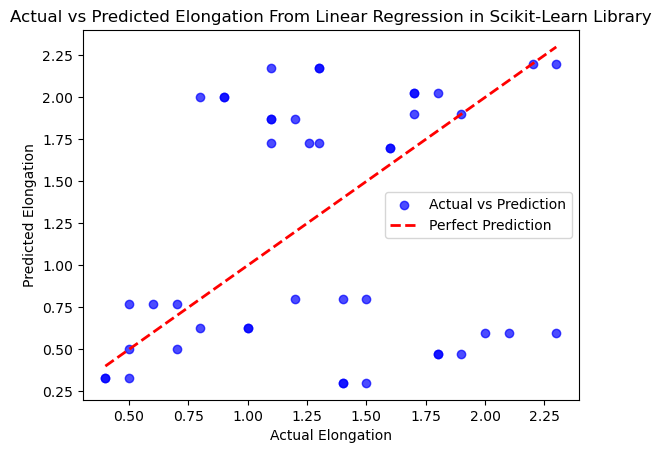

In [153]:
# Visualize the predictions vs actual values
# Scatter plot
plt.scatter(y_test, y_pred, label='Actual vs Prediction', color='blue', alpha=0.7)

# Diagonal line for reference
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Add legends
plt.legend()

# Labels and title
plt.xlabel('Actual Elongation')
plt.ylabel('Predicted Elongation')
plt.title('Actual vs Predicted Elongation From Linear Regression in Scikit-Learn Library')
plt.savefig('./plots/scikit-regression.png')
# Show the plot
plt.show()

#### b. From the model that we've found out via statistical analysis

In [78]:
coeff_estimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   coeff_estimate  16 non-null     float64
dtypes: float64(1)
memory usage: 260.0 bytes


In [130]:
# Extract coefficients from the DataFrame
constant = coeff_estimate.loc[0, 'coeff_estimate']
A = coeff_estimate.loc[1, 'coeff_estimate']
B = coeff_estimate.loc[2, 'coeff_estimate']
C = coeff_estimate.loc[3, 'coeff_estimate']
D = coeff_estimate.loc[4, 'coeff_estimate']
AB = coeff_estimate.loc[5, 'coeff_estimate']
AC = coeff_estimate.loc[6, 'coeff_estimate']
AD = coeff_estimate.loc[7, 'coeff_estimate']
BC = coeff_estimate.loc[8, 'coeff_estimate']
BD = coeff_estimate.loc[9, 'coeff_estimate']
CD = coeff_estimate.loc[10, 'coeff_estimate']
ABC = coeff_estimate.loc[11, 'coeff_estimate']
ABD = coeff_estimate.loc[12, 'coeff_estimate']
ACD = coeff_estimate.loc[13, 'coeff_estimate']
BCD = coeff_estimate.loc[14, 'coeff_estimate']
ABCD = coeff_estimate.loc[15, 'coeff_estimate']

In [131]:
X = df.iloc[:,[0,1,2,3]]

In [132]:
X.rename(columns={'layer_height (A)':'x1', 'nozzle temperature (B) ':'x2','bed_temperature (C) ':'x3', 'fan_speed (D)':'x4'}, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      48 non-null     float64
 1   x2      48 non-null     int64  
 2   x3      48 non-null     int64  
 3   x4      48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [133]:
Y = df.iloc[:,[6]]
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   elongation  48 non-null     float64
dtypes: float64(1)
memory usage: 516.0 bytes


In [135]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.9, random_state=42)

# Calculate predicted values for testing set
y_test_pred = (
    (constant +
    A * X_test['x1'] +
    #B * X_test['x2'] +
    C * X_test['x3'] +
    #D * X_test['x4'] + 
    AB * X_test['x1'] * X_test['x2'] +
    #AC * X_test['x1'] * X_test['x3'] + 
    AD * X_test['x1'] * X_test['x4'] +
    BC * X_test['x2'] * X_test['x3'] +
    BD * X_test['x2'] * X_test['x4'] +
    CD * X_test['x3'] * X_test['x4'] +
    #ABC * X_test['x1'] * X_test['x2'] * X_test['x3'] + 
    ABD * X_test['x1'] * X_test['x2'] * X_test['x4'] +
    ACD * X_test['x1'] * X_test['x3'] * X_test['x4'] +
    #BCD * X_test['x2'] * X_test['x3'] * X_test['x4'] + 
    ABCD * X_test['x1'] * X_test['x2'] * X_test['x3'] * X_test['x4'])/100000
)

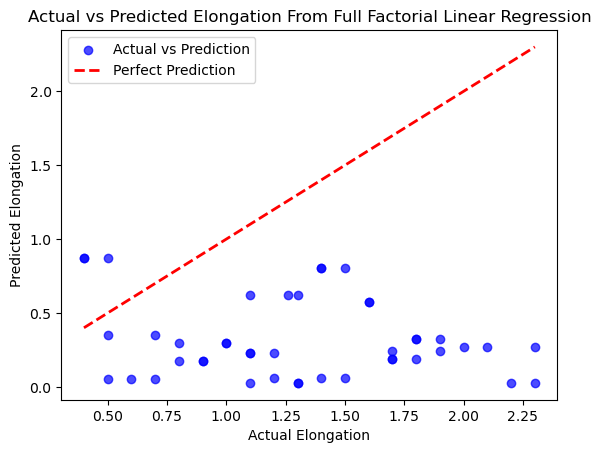

In [152]:
# Predicted vs Actual Plot
# Scatter plot
plt.scatter(y_test, y_test_pred, label='Actual vs Prediction', color='blue', alpha=0.7)

# Diagonal line for reference
#plt.plot([min(y_test_pred), max(y_test_pred)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')

# Add legends
plt.legend()

# Labels and title
plt.xlabel('Actual Elongation')
plt.ylabel('Predicted Elongation')
plt.title('Actual vs Predicted Elongation From Full Factorial Linear Regression')
plt.savefig('./plots/full-factorial-regression.png')
# Show the plot
plt.show()

### 3.6. Analysis Of Variance:

In [137]:
# Error sum of squares (SS_E)
residual = y_test['elongation'] - y_test_pred
SS_E = np.sum((residual)**2)
print("Eror Sum of Squares (SS_E):", SS_E)
# dof = n - p; n = total observations = 48 - 11
print("Mean Square:", SS_E/37)

Eror Sum of Squares (SS_E): 59.96487013431231
Mean Square: 1.6206721657922245


In [ ]:
plt.scatter(y_test_pred, residual)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

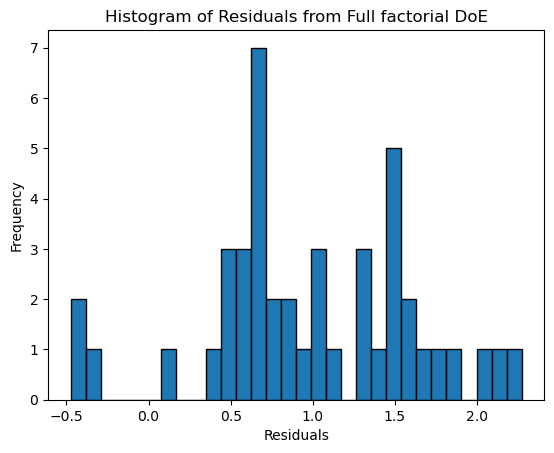

In [144]:
plt.hist(residual, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals from Full factorial DoE')
plt.savefig('./plots/full-factorial-residuals.png')
plt.show()

In [145]:
# Regression sum of squares (SS_R)
SS_R = np.sum((y_test_pred - np.mean(y_test))**2)
print("Sum of Squares Regression(SS_R):", SS_R)
# dof = parameters - 1 = 11 - 1
print("Mean Square:", SS_R/10)

Sum of Squares Regression(SS_R): 45.25172407396681
Mean Square: 4.525172407396681


In [146]:
# Total sum of squares (SS_T)
SS_T = SS_E + SS_R
print("Sum of Squares Error(SS_T):", SS_T)
# dof = n - 1 = 48 - 1 = 47
print("Mean Square:", SS_T/47)

Sum of Squares Error(SS_T): 105.21659420827912
Mean Square: 2.2386509406016835


In [147]:
r2 = SS_R/SS_T
print(r2)

0.43008162747018586


In [150]:
# Significance of regression
f_0 = (SS_R/10)/(SS_E/37)
f = st.f(1,46) # n - 2 = 48-2 = 46
p = 1 - f.cdf(f_0)
print('p value',p)

p value 0.10151753227437921


Since SS_E (Sum of Squares Error) is larger than SS_R (Sum of Squares Model), it suggests that the model is not effectively explaining the variability in the dependent variable. In other words, a larger proportion of the total variability in the dependent variable is unaccounted for by your regression model.

In a well-fitted model, SSm is expected to be larger than SS_E, indicating that the model is capturing a significant portion of the total variability in the dependent variable. However, if SS_E is larger than SS_R, it may suggest that the model is not providing a good fit to the data, and there is substantial unexplained variability.

Possible reasons for this situation include:

- Model inadequacy: The chosen model may not be appropriate for the data, and there might be missing predictors or nonlinear relationships that the model cannot capture.

- Outliers or influential data points: Extreme values in the data may be having a large impact on the residuals, affecting the overall fit of the model.

- Violations of assumptions: The assumptions of linear regression, such as linearity, independence, and homoscedasticity, may be violated.

- Overfitting: The model might be too complex for the given dataset, leading to overfitting and poor generalization to new data.

In our case, it is definitely overfitting.

### 3.7. Confidence Interval

In [154]:
residual_std = np.std(residual, ddof=1)

In [155]:
degrees_of_freedom = len(y_test) - X_test.shape[1] - 1
t_critical = st.t.ppf(0.975, df=degrees_of_freedom)

In [156]:
# confidence intervals
confidence_intervals = t_critical * residual_std * np.sqrt(1 + np.matmul(np.matmul(X_test.values, np.linalg.inv(np.matmul(X_train.values.T, X_train.values))), X_test.values.T).diagonal())
confidence_intervals = np.column_stack((y_test_pred - confidence_intervals, y_test_pred + confidence_intervals))

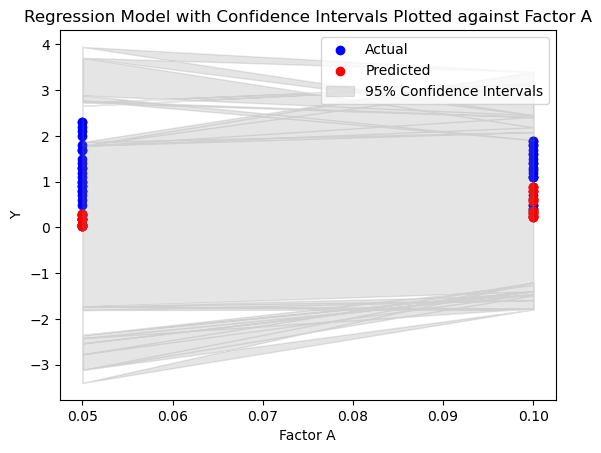

In [169]:
# Plotting the original data
plt.scatter(X_test['x1'], y_test, label='Actual', color='blue')

# Plotting the predicted values
plt.scatter(X_test['x1'], y_test_pred, label='Predicted', color='red')

# Plotting confidence intervals
plt.fill_between(X_test['x1'], confidence_intervals[:, 0], confidence_intervals[:, 1], color='gray', alpha=0.2, label='95% Confidence Intervals')

# Adding labels and legend
plt.xlabel('Factor A')
plt.ylabel('Y')
plt.title('Regression Model with Confidence Intervals Plotted against Factor A')
plt.legend()
plt.savefig('./plots/ci-A.png')
# Show the plot
plt.show()

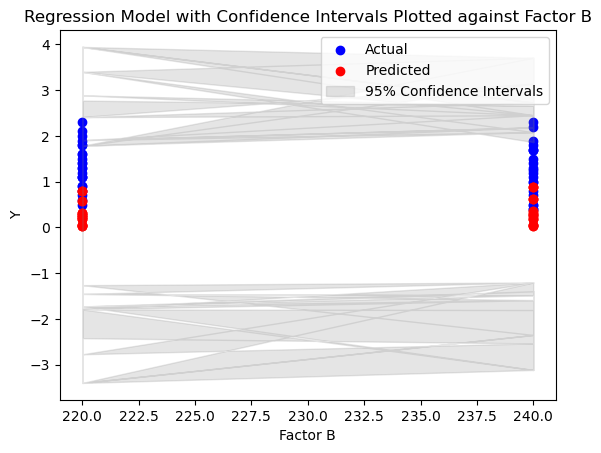

In [170]:
# Plotting the original data
plt.scatter(X_test['x2'], y_test, label='Actual', color='blue')

# Plotting the predicted values
plt.scatter(X_test['x2'], y_test_pred, label='Predicted', color='red')

# Plotting confidence intervals
plt.fill_between(X_test['x2'], confidence_intervals[:, 0], confidence_intervals[:, 1], color='gray', alpha=0.2, label='95% Confidence Intervals')

# Adding labels and legend
plt.xlabel('Factor B')
plt.ylabel('Y')
plt.title('Regression Model with Confidence Intervals Plotted against Factor B')
plt.legend()
plt.savefig('./plots/ci-B.png')
# Show the plot
plt.show()

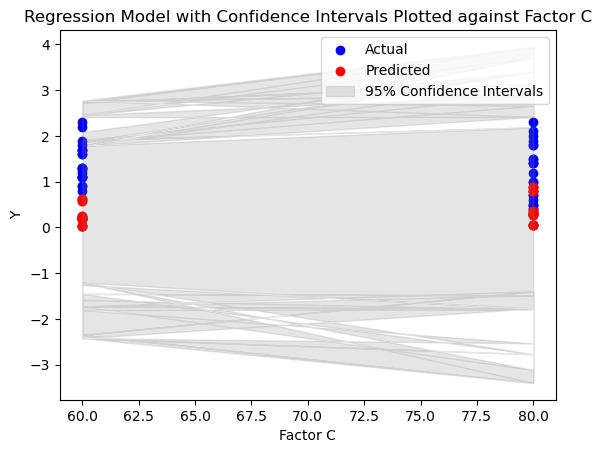

In [171]:
# Plotting the original data
plt.scatter(X_test['x3'], y_test, label='Actual', color='blue')

# Plotting the predicted values
plt.scatter(X_test['x3'], y_test_pred, label='Predicted', color='red')

# Plotting confidence intervals
plt.fill_between(X_test['x3'], confidence_intervals[:, 0], confidence_intervals[:, 1], color='gray', alpha=0.2, label='95% Confidence Intervals')

# Adding labels and legend
plt.xlabel('Factor C')
plt.ylabel('Y')
plt.title('Regression Model with Confidence Intervals Plotted against Factor C')
plt.legend()
plt.savefig('./plots/ci-C.png')
# Show the plot
plt.show()

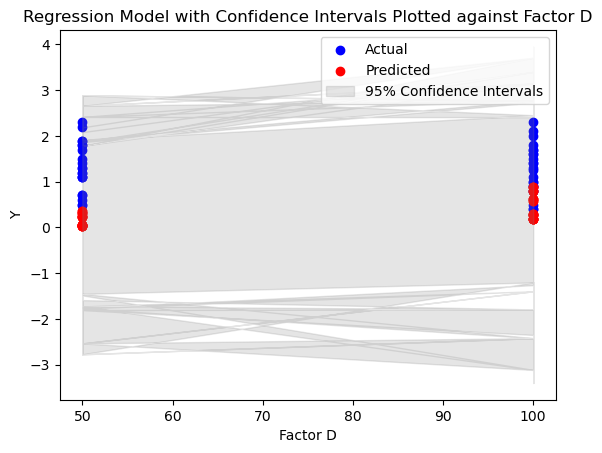

In [172]:
# Plotting the original data
plt.scatter(X_test['x4'], y_test, label='Actual', color='blue')

# Plotting the predicted values
plt.scatter(X_test['x4'], y_test_pred, label='Predicted', color='red')

# Plotting confidence intervals
plt.fill_between(X_test['x4'], confidence_intervals[:, 0], confidence_intervals[:, 1], color='gray', alpha=0.2, label='95% Confidence Intervals')

# Adding labels and legend
plt.xlabel('Factor D')
plt.ylabel('Y')
plt.title('Regression Model with Confidence Intervals Plotted against Factor D')
plt.legend()
plt.savefig('./plots/ci-D.png')
# Show the plot
plt.show()

regression is behaving so bad because for each factor we’ve only two levels. So it doesn’t have much to build the model on. Ideally it would make more sense to have lots of levels per factor. But since we’re hard coding everything in python and not using any statistical software; we’ve limited to 2-levels otherwise it would become too cumbersome to code everything manually.

## 4. Elongation Only: Fractional Factorial

The $2^4-1$ Design with Defininig Relation I = ABCD
### 4.1. Treatment Combinations of Effects

In [174]:
# treatment combination 
A_BCD = 1/4 * (-one +ad -bd +ab -cd +ac -bc + abcd)
B_ACD = 1/4 * (-one -ad +bd +ab -cd -ac +bc + abcd)
C_ABD = 1/4 * (-one -ad -bd -ab +cd +ac +bc + abcd)
D_ABC = 1/4 * (-one +ad +bd -ab +cd -ac -bc + abcd)
AB_CD = 1/4 * (+one -ad -bd +ab +cd -ac -bc + abcd)
AC_BD = 1/4 * (+one -ad +bd -ab -cd +ac -bc + abcd)
AD_BC = 1/4 * (+one +ad -bd -ab -cd -ac +bc + abcd)

### 4.2. Coeffecients of Fractional Effects

In [175]:
frac_effects = {'frac_eff':[A_BCD, B_ACD, C_ABD, D_ABC, AB_CD, AC_BD, AD_BC]}
frac_factorial = pd.DataFrame(frac_effects)
frac_coeff = frac_factorial/2
frac_coeff.rename(columns={'frac_eff':'frac_coeff'}, inplace=True)
# 3.9725 - grand average of all the observations
new_row = pd.DataFrame({'frac_coeff': [3.9725]})
frac_coeff = pd.concat([new_row, frac_coeff], ignore_index=True)
frac_coeff

frac_coeff
0      3.9725
1     -0.1250
2     -0.2500
3     -0.5500
4     -0.2750
5     -0.3500
6     -0.6500
7     -1.0750

In [178]:
frac = {'frac_eff':['A_BCD', 'B_ACD', 'C_ABD', 'D_ABC', 'AB_CD', 'AC_BD', 'AD_BC']}
frac = pd.DataFrame(frac)
frac_effect_only = pd.concat([frac, frac_factorial], axis = 1)
frac_effect_only.to_csv('./output-datasets/' + 'fractional_estimates_only.csv', index=False)

### 4.3. Standard Error of Fractional Coeff

In [179]:
k = 3
f_coeff = np.array(frac_coeff.values)
n = len(frac_coeff)
result_mean = np.mean(result)
sigma_hat_squared_i = np.array(np.sum((f_coeff - result_mean) ** 2) / (n - 1))
sigma_hat_squared = np.sum(sigma_hat_squared_i/(2**k))
f_se_Effect = np.sqrt(sigma_hat_squared/(n*2**(k-2)))

In [180]:
print('se_effect:',f_se_Effect, 'constant:',result_mean, 'se_coeff:',f_se_Effect/2)

se_effect: 0.3933629670267971 constant: 3.9725 se_coeff: 0.19668148351339854


### 4.4. Fractional t-ratios

In [184]:
frac_t = (2*frac_coeff)/f_se_Effect
frac_t.rename(columns={'frac_ceff':'frac_t'}, inplace=True)
frac_t

frac_coeff
0   20.197631
1   -0.635545
2   -1.271091
3   -2.796399
4   -1.398200
5   -1.779527
6   -3.304836
7   -5.465690

In [183]:
alpha = 0.025
# degrees of freedom = 2^4.3 = 48
def P(t_ratios):
    t = st.t(df=47)
    return 2 * (1 - t.cdf(abs(t_ratios)))

# Apply the P function to each row in the DataFrame
P_value = frac_t.apply(P)
P_value.rename(columns={'frac_coeff':'P-value'}, inplace=True)
# Check significance for each t-ratio
frac_Significance = P_value < alpha
frac_Significance.rename(columns={'P-value':'Significance'}, inplace=True)
# Print the results
print('DataFrame with P values and significance:')
print(frac_Significance)

DataFrame with P values and significance:
   Significance
0          True
1         False
2         False
3          True
4         False
5         False
6          True
7          True


In [187]:
frac_combo = {'frac_combo':['constant', 'A_BCD', 'B_ACD', 'C_ABD', 'D_ABC', 'AB_CD', 'AC_BD', 'AD_BC']}
frac_combo = pd.DataFrame(frac_combo)
frac_full_coeff_computation = pd.concat([frac_combo, frac_coeff, frac_t, P_value, frac_Significance], axis = 1)
#frac_effect_only.to_csv('./output-datasets/' + 'fractional_estimates_only.csv', index=False)
frac_full_coeff_computation.to_csv('./output-datasets/' + 'fractional_full_computations.csv', index=False)

regression model = contant + (C_ABD/2)x3 + (AC_BD/2)x1x3 + (AD_BC/2)x1x4 

- Interpretetion:
Interactions involving factors A, B, and D (e.g., AB, AD, BD, ABD) are not explicitly present in Model2. This suggests that these interactions are confounded or combined with other effects, leading to a simplified model. The remaining interactions in Model2 involve factor C combined with various interactions (C+ABD, AC + BD, AD + BC). This suggests that factor C plays a significant role in these interactions. Model2 provides a more parsimonious representation of the system, focusing on the key interactions that are considered most influential in the response variable.

## 5. Response Surface Method: Second-Order Model Considered Only

In [201]:
X = df.iloc[:,[0,1,2,3]]
X.rename(columns={'layer_height (A)':'x1', 'nozzle temperature (B) ':'x2','bed_temperature (C) ':'x3', 'fan_speed (D)':'x4'}, inplace = True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      48 non-null     float64
 1   x2      48 non-null     int64  
 2   x3      48 non-null     int64  
 3   x4      48 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 1.6 KB


In [202]:
Y = df.iloc[:,[6]]
Y.rename(columns={'elongation':'y1'}, inplace = True)
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y1      48 non-null     float64
dtypes: float64(1)
memory usage: 516.0 bytes


In [203]:
x1 = X['x1'].values
x2 = X['x2'].values
x3 = X['x3'].values
x4 = X['x4'].values
y1 = Y['y1'].values

In [204]:
M = np.vstack([np.ones(len(x1)), x1, x2, x3, x4, x1**2, x2**2, x3**2, x4**2, x1*x2, 
               x2*x3, x3*x4, x1*x4]).T
print(M)

[[1.00e+00 5.00e-02 2.20e+02 6.00e+01 5.00e+01 2.50e-03 4.84e+04 3.60e+03
  2.50e+03 1.10e+01 1.32e+04 3.00e+03 2.50e+00]
 [1.00e+00 5.00e-02 2.20e+02 6.00e+01 5.00e+01 2.50e-03 4.84e+04 3.60e+03
  2.50e+03 1.10e+01 1.32e+04 3.00e+03 2.50e+00]
 [1.00e+00 5.00e-02 2.20e+02 6.00e+01 5.00e+01 2.50e-03 4.84e+04 3.60e+03
  2.50e+03 1.10e+01 1.32e+04 3.00e+03 2.50e+00]
 [1.00e+00 5.00e-02 2.20e+02 6.00e+01 1.00e+02 2.50e-03 4.84e+04 3.60e+03
  1.00e+04 1.10e+01 1.32e+04 6.00e+03 5.00e+00]
 [1.00e+00 5.00e-02 2.20e+02 6.00e+01 1.00e+02 2.50e-03 4.84e+04 3.60e+03
  1.00e+04 1.10e+01 1.32e+04 6.00e+03 5.00e+00]
 [1.00e+00 5.00e-02 2.20e+02 6.00e+01 1.00e+02 2.50e-03 4.84e+04 3.60e+03
  1.00e+04 1.10e+01 1.32e+04 6.00e+03 5.00e+00]
 [1.00e+00 5.00e-02 2.20e+02 8.00e+01 5.00e+01 2.50e-03 4.84e+04 6.40e+03
  2.50e+03 1.10e+01 1.76e+04 4.00e+03 2.50e+00]
 [1.00e+00 5.00e-02 2.20e+02 8.00e+01 5.00e+01 2.50e-03 4.84e+04 6.40e+03
  2.50e+03 1.10e+01 1.76e+04 4.00e+03 2.50e+00]
 [1.00e+00 5.00e-02 2.20

In [205]:
beta = np.linalg.lstsq(M, y1, rcond=None)[0]
print(beta, len(beta))

[-3.48324396e-04  1.95925020e+02 -3.99801042e-02 -1.19086511e-02
 -1.16112529e-02  2.93887548e+01  6.80210371e-04  4.74577608e-03
 -6.59249809e-05 -8.53333333e-01 -3.03333333e-03  3.86666667e-04
 -8.80000000e-02] 13


In [206]:
def model(x1, x2, x3, x4, beta):
  return beta[0] + beta[1]*x1 + beta[2]*x2 + beta[3]*x3 + beta[4]*x4 + beta[5]*(x1**2) + beta[6]*(x2**2) + beta[7]*(x3**2) + beta[8]*(x4**2) + beta[9]*(x1*x2) + beta[10]*(x2*x3) + beta[11]*(x3*x4) + beta[12]*(x1*x4)

In [207]:
%matplotlib inline
yy= np.empty((50,50,50,50))
for i,xx_1 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),50)):
    for j,xx_2 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),50)):
        for k,xx_3 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),50)):
            for l,xx_4 in enumerate(np.linspace(-np.sqrt(2),np.sqrt(2),50)):
                yy[i,j,k,l] = model(xx_1,xx_2,xx_3,xx_4, beta)

In [ ]:
x1x2 = yy[:,:,0,0]
plt.imshow(x1x2, cmap='viridis')
plt.xlabel('A')
plt.ylabel('B')
plt.colorbar()
plt.savefig('./plots/RSM-A-B.png')
plt.show()

In [ ]:
x2x3 = yy[0,:,:,0]
plt.imshow(x2x3, cmap='viridis')
plt.xlabel('B')
plt.ylabel('C')
plt.colorbar()
plt.savefig('./plots/RSM-B-C.png')
plt.show()

In [ ]:
x1x3 = yy[:,0,:,0]
plt.imshow(x1x3, cmap='viridis')
plt.xlabel('A')
plt.ylabel('C')
plt.colorbar()
plt.savefig('./plots/RSM-A-C.png')
plt.show()

In [ ]:
x1x4 = yy[:,0,0,:]
plt.imshow(x1x4, cmap='viridis')
plt.xlabel('A')
plt.ylabel('D')
plt.colorbar()
plt.savefig('./plots/RSM-A-D.png')
plt.show()